# 🎬 Netflix Data Analysis Project

In this project, we perform Exploratory Data Analysis (EDA) on the Netflix Titles dataset to uncover trends, patterns, and insights about the content available on the platform.  
We’ll analyze various factors such as:

- Total number of titles
- Type distribution (Movies vs. TV Shows)
- Genre popularity
- Content release trends over time
- Ratings and average duration
- Country-wise content contribution
- Top directors and most frequent genres

📦 **Dataset Source**: [Netflix Titles Dataset on Kaggle](https://www.kaggle.com/shivamb/netflix-shows)

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## 🔍 Dataset Overview

We start by importing the dataset and understanding its structure using `.info()` and `.head()`.

### Key Columns:
- `title`: Name of the show/movie
- `type`: Movie or TV Show
- `director`, `cast`: Names of directors and actors
- `country`: Production country
- `date_added`: When the title was added to Netflix
- `release_year`: Year of original release
- `rating`: Age rating (PG, TV-MA, etc.)
- `duration`: Duration in minutes or seasons
- `listed_in`: Genre/category

We'll perform cleaning and transformation where necessary.



In [414]:
df=pd.read_csv("netflix_titles.csv")

In [415]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


#### Check Datatype of each Column

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Check null values in Dataset

In [417]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Handle Null values according to column

In [418]:
df["director"]=df["director"].fillna("Unknown")
df["cast"]=df["cast"].fillna("Not Available")
df["country"]=df["country"].fillna("Unknown")
df["rating"]=df["rating"].fillna(0)
df["duration"]=df["duration"].fillna("0 min")

#### howmany Rows & Columns thier in Dataset

In [419]:
len(df.columns)

12

In [420]:
df.shape[0]

8807

## 🎥 Step 2: Movies vs. TV Shows Distribution

Let’s analyze the distribution of content type to see how many Movies and TV Shows are available on Netflix.


How many total titles are available on Netflix?

In [421]:
df["title"].nunique()


8807

> 🔍 **Insight**: Netflix has a total of `8807` unique titles (Movies + TV Shows combined).  
This shows the vast content library available globally. The diversity in titles caters to a wide range of audiences.


How many are Movies vs. TV Shows 

In [422]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

>🎥 **Insight**: The majority of Netflix content consists of **Movies**, outnumbering TV Shows significantly.  
This suggests Netflix focuses more on standalone, shorter content pieces rather than episodic shows — possibly due to production costs or licensing.


## 🎭 Step 3: Unique Genres on Netflix

We analyze the `listed_in` column to extract and count all the unique genres.  
Since this column contains comma-separated values, we split and explode it to get a clearer picture.


What is the total number of unique genres

In [423]:
df["genres"]=df["listed_in"].str.split(',')
unique_genres=df.explode("genres")
unique_genres["genres"].nunique()

73

> 🎭 **Insight**: Netflix content spans over `73` unique genres.  
This wide range of genres reflects Netflix’s attempt to localize and personalize content across countries and age groups.


## 📆 Step 4: Titles Added Over the Years

Netflix continuously adds new content every year.  
Here, we convert the `date_added` column to datetime format and extract the year to analyze annual trends.


In [424]:
df["date_added"]=pd.to_datetime(df["date_added"],format="mixed")

In [425]:
df["year_added"]=df["date_added"].dt.year
df["year_added"].value_counts().sort_index()

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64

In which year was the highest number of titles added?

In [426]:
df["year_added"].value_counts().idxmax()

2019.0

## 📈 Step 5: Trend of Content Release by Year

Now, we analyze the `release_year` to understand how Netflix content has evolved over time.
A line plot is used to visualize the trend.


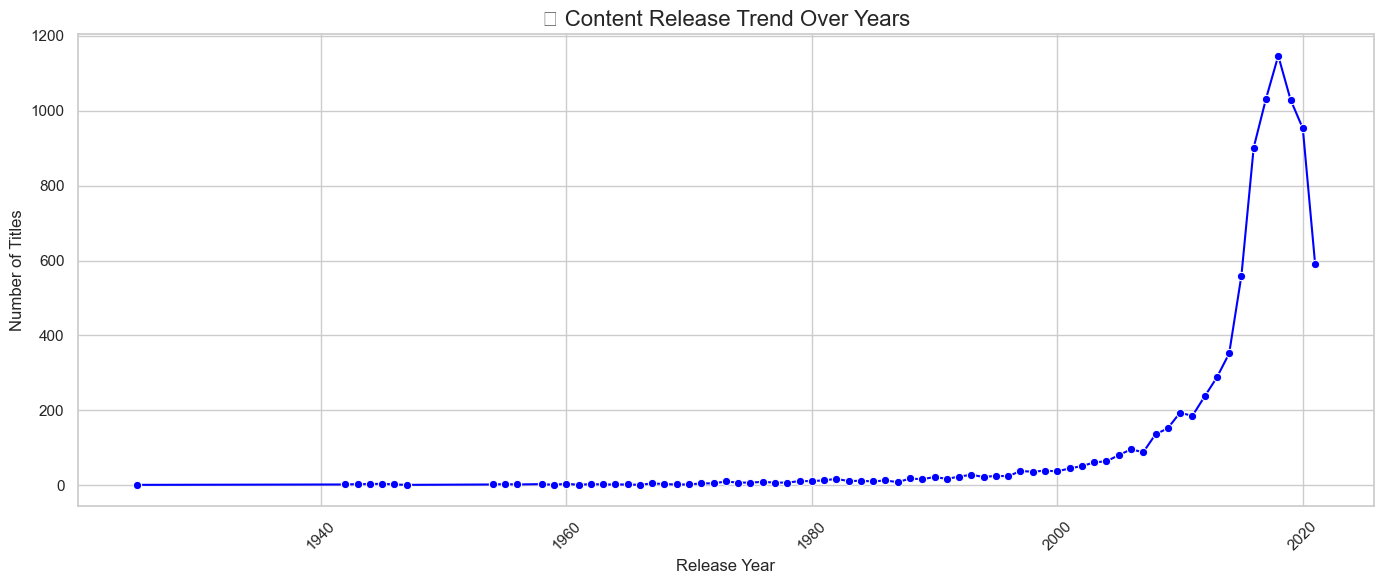

In [471]:
release_trend = df["release_year"].value_counts().sort_index()
release_trend_df = release_trend.reset_index()
release_trend_df.columns = ["Release Year", "Number of Titles"]

sns.set(style="whitegrid")

# Step 3: Create the line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=release_trend_df, x="Release Year", y="Number of Titles", marker='o', color='blue')

# Step 4: Customize the plot
plt.title("📈 Content Release Trend Over Years", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> 📅 **Insight**: Netflix saw a sharp increase in content addition around **2018–2020**, with a peak in `2019`.  
This aligns with the period of aggressive content expansion, particularly original series and regional content for global markets.


## 🗓️ Step 6: Monthly Addition Trend

We extract the month from `date_added` and analyze which months see the most new content being added to Netflix.


In [428]:
df["month_added"]=df["date_added"].dt.month
df["month_added"].value_counts().idxmax()

7.0

## 🌍 Step 7: Country-Wise Content Insights

We explore which countries contribute the most content to Netflix.
For better analysis, we handle multi-country rows using `.explode()`.


> Which are the top 10 countries with the most content on Netflix?

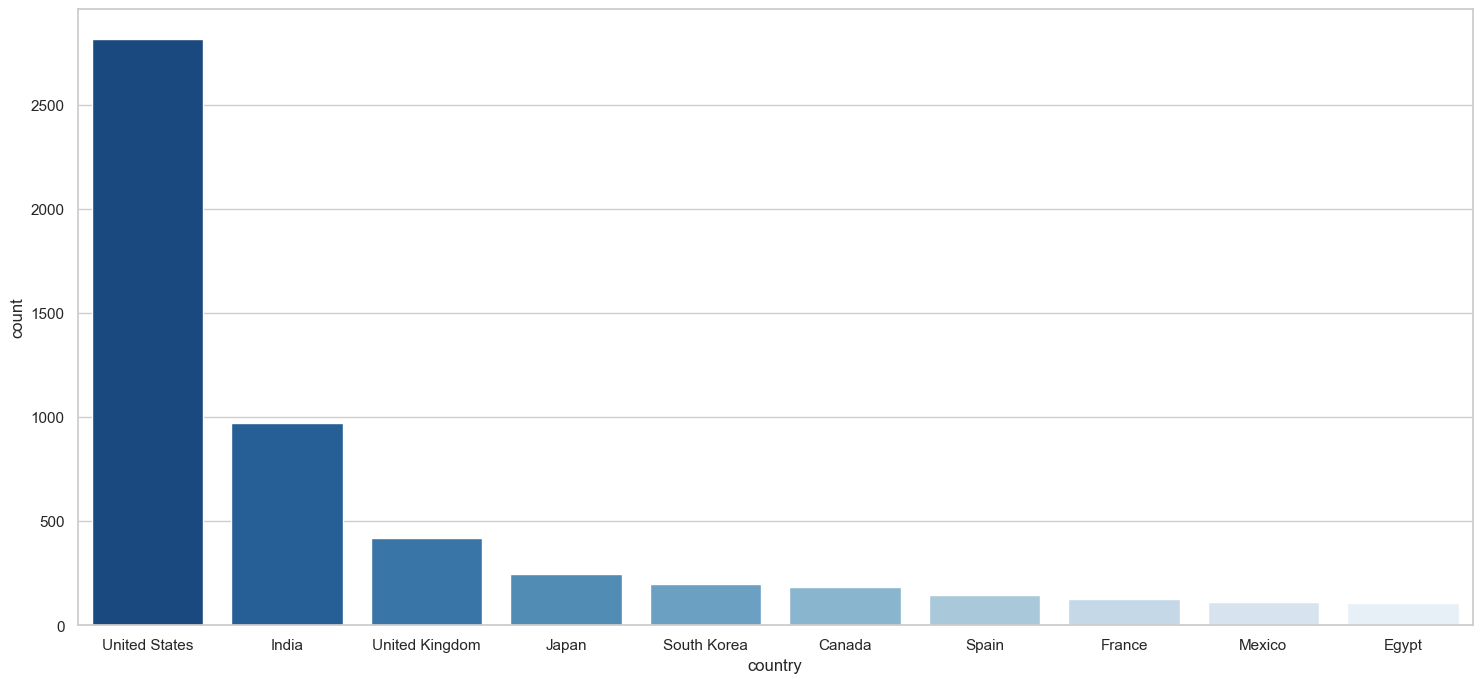

In [491]:
# df["country"]=df["country"].fillna("Unknown")
top_contries=df.copy()
top_contries["country"]=top_contries["country"].str.split(',')
exploded_df=df.explode('country')
p=exploded_df["country"].value_counts().head(10).reset_index()
plt.figure(figsize=(18,8))
barplot = sns.barplot(
    data=p,
    x="country",
    y="count",
    palette="Blues_r"  # Reversed Reds for similar color effect
)

plt.show()


> 🌍 **Insight**: The **USA** leads in Netflix content production, followed by **India** and the **UK**.  
These countries are major entertainment hubs, contributing both original and licensed content to the platform.


> #### What type of content (Movies or TV Shows) is most common in India

In [430]:
content=exploded_df.groupby(["country","type"]).size().reset_index(name="count")
content[content["country"]=="India"]

,country,type,count
284,India,Movie,893
285,India,TV Show,79


> #### Which countries have produced the most TV Shows

In [431]:
tv_show=df[df["type"]=="TV Show"]
tv_show=tv_show.dropna(subset=["country"])
tv_show["country"]=tv_show["country"].str.split(',')
tv_show=tv_show.explode("country")
top_country=tv_show['country'].value_counts()
top_country.head(1)

country
United States    847
Name: count, dtype: int64

## 🎭 Step 8: Most Common Genres by Type and Country

We analyze genre trends by filtering for content types (Movie vs TV Show) and countries (like India).
This gives a more detailed view of content preferences across geographies and formats.


In [462]:
common_genres=df.explode("genres")
common_genres["genres"].value_counts().sort_values(ascending=False).head().reset_index()


,genres,count
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829


## 🔠 Step 9: Distribution of Content Ratings

Let’s analyze the most common content ratings (like TV-MA, PG, etc.) using a pie chart to visualize their distribution.


In [433]:
df["rating"].value_counts().sort_values(ascending=False).idxmax()

'TV-MA'

>#### What is the average duration of a Movie on Netflix?

In [434]:
movies=df[df["type"]=="Movie"].copy()
movies["minutes"]=movies["duration"].str.extract(r'(\d+)').astype(float)
movies["minutes"].mean()

99.52846191485891

> ⏱️ **Insight**: The average duration of a Netflix movie is **~99 minutes**, which is consistent with traditional film lengths.  
This suggests that Netflix follows standard runtime expectations for feature films.


## 🎬 Step 10: Top 10 Directors on Netflix

This section lists the directors with the most content available on Netflix.  
We clean and split the `director` column to account for multiple directors per entry.


In [449]:
df=pd.read_csv("netflix_titles.csv")
df['director']=df['director'].str.split(',')
directors=df.explode('director')

In [465]:
directors['director'].value_counts().sort_values(ascending=False).head(10)

director
Rajiv Chilaka          22
Raúl Campos            18
 Jan Suter             18
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: count, dtype: int64

> 🎬 **Insight**: The top directors on Netflix have multiple releases, often in documentary or international cinema genres.  
Netflix likely maintains long-term content partnerships with high-performing or regionally popular directors.


## Step 11:Plot Rating Distribution
Create a pie chart of content ratings distribution (TV-MA, PG, etc.)

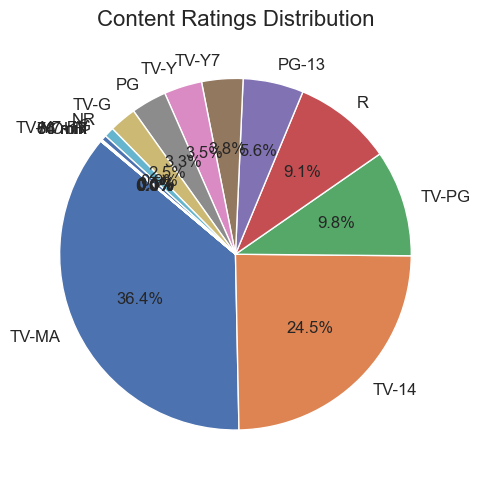

In [480]:
rating_counts=df["rating"].value_counts().reset_index(name="count")
rating_counts.columns = ["Rating", "Count"]
plt.figure(figsize=(10, 5))
colors = plt.cm.Pastel1.colors  # Optional: use a clean color palette
plt.pie(
    rating_counts["Count"],
    labels=rating_counts["Rating"],
    autopct='%1.1f%%',
    startangle=140,
    # colors=colors,
    textprops={'fontsize': 12}
)

# Step 3: Add title and save
plt.title("Content Ratings Distribution", fontsize=16)
plt.tight_layout()
# plt.savefig("content_rating_piechart.png", dpi=300, bbox_inches='tight')
plt.show()

> 🔠 **Insight**: The most common rating is **TV-MA**, indicating a strong focus on mature content.  
This shows Netflix’s adult-first content strategy, with limited offerings for younger audiences (like TV-Y or G-rated).


## 🎭 Genre Popularity by Content Type

We group genres by type (Movie or TV Show) and find top genres for each.

In [451]:
df["genres"]=df["listed_in"].str.split(',')
exp_genres=df.explode("genres")
explod_country=exp_genres.explode('country')
genre_by_country = explod_country.groupby(['country', 'genres']).size().reset_index(name='count')

In [441]:
genre_by_country[genre_by_country["country"]=='India'].sort_values('count',ascending=False).head()

,country,genres,count
1081,India,International Movies,779
1109,India,Dramas,384
1104,India,Comedies,262
1077,India,Dramas,236
1080,India,Independent Movies,149


#### most common genres by type

In [452]:
genres_by_type=exp_genres.groupby(["genres","type"]).size().reset_index(name="count")

In [453]:
genres_by_type[genres_by_type['type']=="Movie"].sort_values('count',ascending=False).head()

,genres,type,count
13,International Movies,Movie,2624
49,Dramas,Movie,1600
44,Comedies,Movie,1210
37,Action & Adventure,Movie,859
47,Documentaries,Movie,829


In [454]:
genres_by_type[genres_by_type['type']=="TV Show"].sort_values('count',ascending=False).head()

,genres,type,count
53,International TV Shows,TV Show,774
30,TV Dramas,TV Show,696
14,International TV Shows,TV Show,577
29,TV Comedies,TV Show,461
45,Crime TV Shows,TV Show,399


> 🎭 **Insight**:
- **Movies** are dominated by genres like *Dramas*, *International Movies*, and *Comedies*.
- **TV Shows** are led by *International TV Shows*, *Dramas*, and *Kids' TV*.

This shows that while both types favor dramas, Netflix's TV catalog leans toward family and international storytelling.


### Overall genres plot
Plotting bar Graph for Overall Genres Count on Netflix

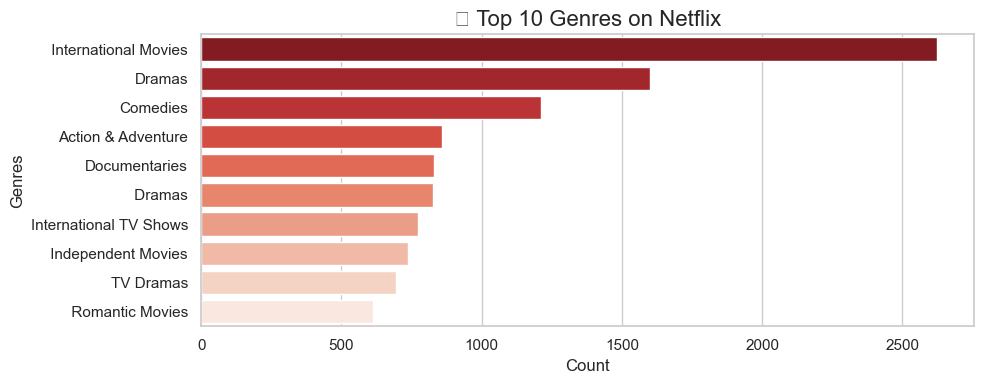

In [476]:
overall = exp_genres["genres"].value_counts().head(10).reset_index()
overall.columns = ["Genres", "Count"]

# Step 2: Set up the plot
plt.figure(figsize=(10, 4))
sns.set_theme(style="whitegrid")

# Step 3: Create horizontal barplot
barplot = sns.barplot(
    data=overall,
    y="Genres",
    x="Count",
    palette="Reds_r"  # Reversed Reds for similar color effect
)

# Step 4: Customize plot
plt.title("Top 10 Genres on Netflix", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Genres")

# Step 5: Save the plot as PNG (will display on GitHub)
plt.tight_layout()

plt.show()

# ✅ Conclusion

This project provided valuable insights into Netflix’s content strategy using real-world data.

### Key Takeaways:
- Movies dominate the Netflix catalog
- Dramatic and international content leads genre popularity
- Content growth surged between 2016–2020
- Majority of content targets mature audiences
- India and the US are key content contributors


📂 Check out the full notebook and visualizations in this repo. Feedback and suggestions are welcome! 🚀
